In [25]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as const
import matplotlib as mpl
import matplotlib.cm as cm
from scipy.integrate import simps

output_dir = 'output/Log'

cmap = mpl.cm.viridis
norm = mpl.colors.Normalize(vmin = 1, vmax = 100)
AGN_T_ = np.logspace(4, np.log10(1.5e6), 100)
incident_continuums = {}
UV_continuums = {}
Data = {}
top_hats = []
incidents = []
temps = []
lums = []
for i in range(100):
    
    AGN_T = AGN_T_[i]
    AGN_T = round(int(AGN_T), 3 - len(str(int(AGN_T))))
    i+=1
    cont = np.loadtxt(f'{output_dir}/{i}.cont', delimiter='\t', dtype=str)#, usecols = (0,1,2,3,4,8))
    cont_nu, cont_incident, cont_transmitted, cont_nebular, cont_total, cont_linecont = cont[:,0], cont[:,1], cont[:,2], cont[:,3], cont[:,4], cont[:,8], 

    nu, incident, transmitted, total = np.zeros(len(cont_nu)), np.zeros(len(cont_nu)), np.zeros(len(cont_nu)), np.zeros(len(cont_nu))
    for ii in range(len(nu)):
        nu[ii] = float(cont_nu[ii])
        incident[ii] = float(cont_incident[ii])
        transmitted[ii] = float(cont_transmitted[ii])
        total[ii] = float(cont_total[ii])
        
    nu = np.flip(nu)
    total = np.flip(total)
    incident = np.flip(incident)    
    total_cut, nu_cut, incident_cut = [], [], []
    for iii in range(len(nu)):
        if nu[iii] < 1400:
            continue
        elif nu[iii] > 1600:
            continue
        else:
            total_cut.append(total[iii])
            nu_cut.append(nu[iii])
            incident_cut.append(incident[iii])
    inc = simps(incident, nu)
    top_hat = simps(total_cut, nu_cut)
    lum = []
    for iiii in range(len(nu)):
        lum.append(incident[iiii]/nu[iiii])

    integral = simps((total), nu)
    integral_cut = simps((incident_cut), nu_cut)
    lum_int = simps(lum, nu)
    
    
    incident_continuums.update({AGN_T:inc})
    UV_continuums.update({AGN_T:top_hat})
    top_hats.append(top_hat)
    incidents.append(inc)
    temps.append(AGN_T)
    lums.append(lum_int)
Data.update({"L_bol":incidents})
Data.update({"AGN_T":temps})
Data.update({"FUV":top_hats})
Data.update({"Incident":lums})

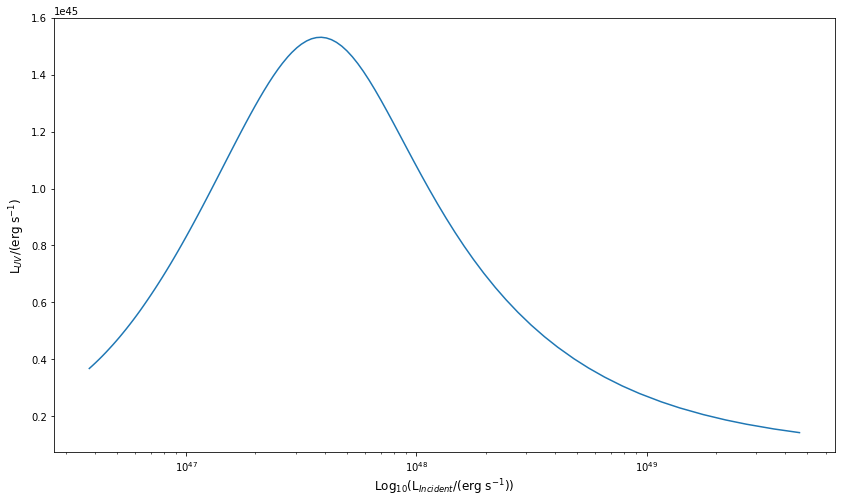

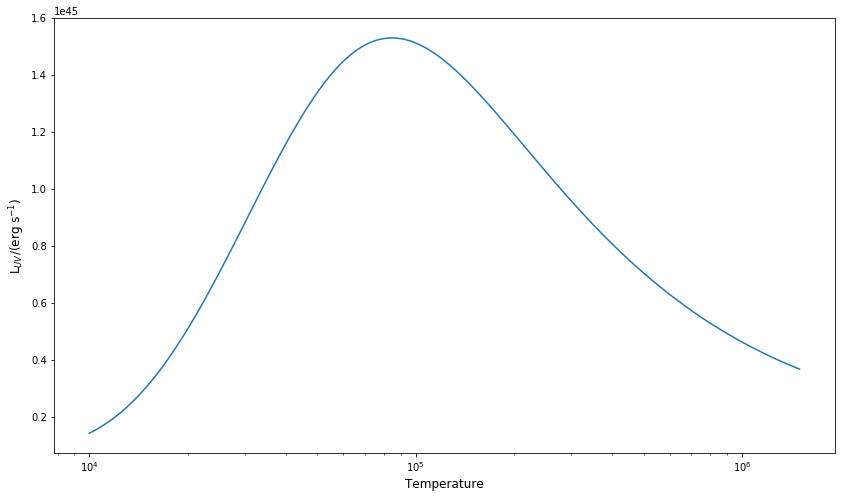

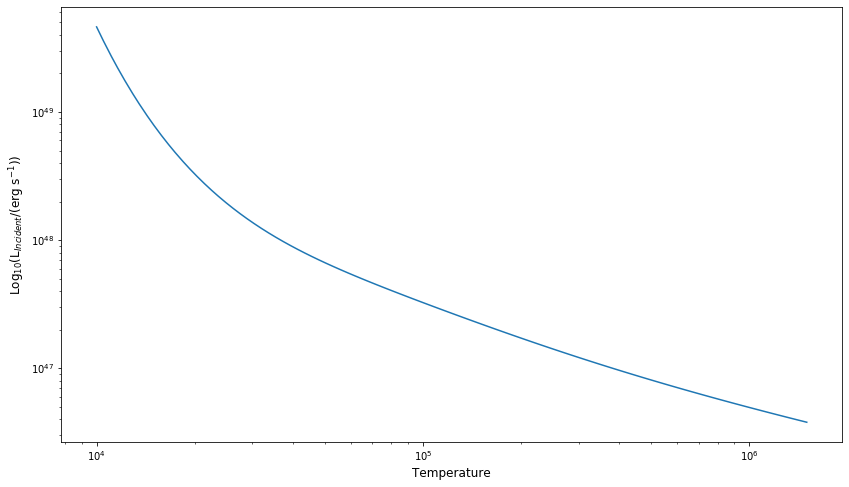

In [26]:
plt.figure(figsize = (14, 8))
plt.plot(Data["L_bol"], Data["FUV"])
plt.xscale("log")
#plt.yscale("log")
plt.xlabel(r"Log$_{10}$(L$_{Incident}$/(erg s$^{-1}$))", size = 12)
plt.ylabel(r"L$_{UV}$/(erg s$^{-1}$)", size = 12)
plt.show()

plt.figure(figsize = (14, 8))
plt.plot(Data["AGN_T"], Data["FUV"])
plt.xscale("log")
#plt.yscale("log")
plt.xlabel("Temperature", size = 12)
plt.ylabel(r"L$_{UV}$/(erg s$^{-1}$)", size = 12)
plt.show()

plt.figure(figsize = (14, 8))
plt.plot(Data["AGN_T"], Data["L_bol"])
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Temperature", size = 12)
plt.ylabel(r"Log$_{10}$(L$_{Incident}$/(erg s$^{-1}$))", size = 12)
plt.show()